## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

## Part 1

In [2]:
N = 5  #Number of points
mu = 1
sigma = 0.2

In [3]:
x_i = np.random.normal(mu, sigma, N)  #Generating N points from a normal distribution
x_grid = np.linspace(0, 2, 1000)

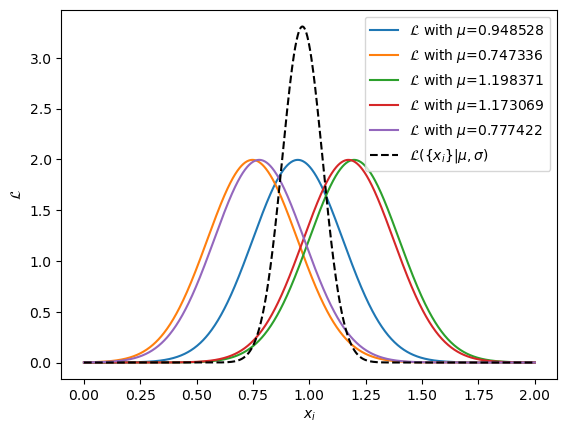

In [4]:
likelihood = np.array([norm.pdf(x_grid,loc = x, scale = sigma) for x in x_i])  #Computing N likelihoods centered in each point

for i in range(N):
    plt.plot(x_grid, likelihood[i], label = '$\mathcal{L}$ with $\mu$=%f' %(x_i[i]))

tot_likelihood = np.prod(likelihood, axis=0)  #Computing the likelihood of the dataset (axis=0 means that the product is computed along the rows)

#Plotting the results
plt.plot(x_grid, tot_likelihood, color = 'black', ls = '--', label = '$\mathcal{L}(\{x_i\}|\mu,\sigma)$')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()

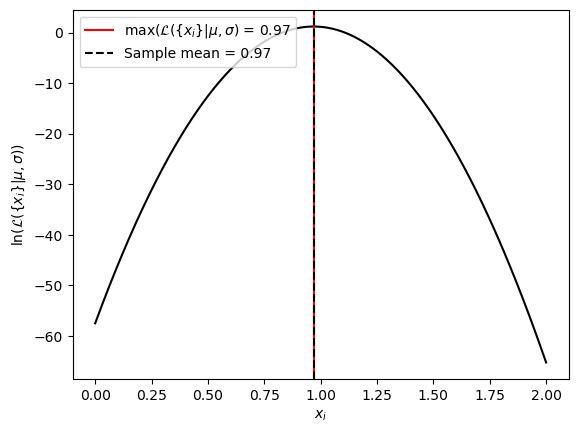

In [5]:
#Comparison between the maximum of the likelihood and the MLE that is the sample mean
log_likelihood = np.log(tot_likelihood)
index_max = np.argsort(log_likelihood)[-1]  #Computing the index of the maximum of the log L
ML = x_grid[index_max]
plt.plot(x_grid, log_likelihood, color = 'black')
plt.axvline(ML, color = 'red', label = 'max($\mathcal{L}(\{x_i\}|\mu,\sigma)$ = %0.2f' %ML)
plt.axvline(np.mean(x_i), color = 'black', label = 'Sample mean = %0.2f' %np.mean(x_i), ls ='--')
plt.xlabel('$x_i$')
plt.ylabel('ln($\mathcal{L}(\{x_i\}| \mu,\sigma)$)')
plt.legend(loc = 'upper left')
plt.show()

## Part 2

In [6]:
#Fisher formalism on estimated mean
sigma_fisher = np.diff(log_likelihood, n=2)
sigma_fisher /= (x_grid[1]-x_grid[0])**2
sigma_fisher *= -1
sigma_fisher = 1/(sigma_fisher**0.5)

#Fisher matrix error
MLE_sigma = sigma/N**0.5

print('Fisher matrix error on estimated mean: %0.3f\nFisher matrix error: %0.3f' %(sigma_fisher[index_max], MLE_sigma))


Fisher matrix error on estimated mean: 0.089
Fisher matrix error: 0.089


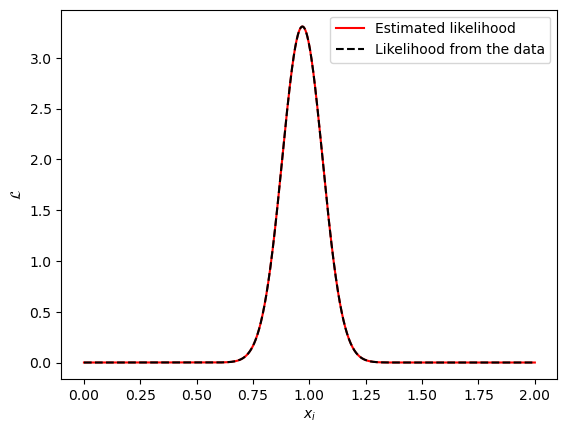

In [7]:
#Computing the likelihood centered on the estimated mean and rescaling it
new_likelihood = norm.pdf(x_grid, loc = ML, scale = sigma_fisher[index_max])
plt.plot(x_grid, new_likelihood*(max(tot_likelihood)/max(new_likelihood)), color = 'red', label = 'Estimated likelihood')
plt.plot(x_grid, tot_likelihood, color = 'black', label = 'Likelihood from the data', ls='--')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()

## Part 3

In [8]:
mu = 1
sigma_i = np.random.normal(0.2, 0.05, N)

In [9]:
x_i = np.array([np.random.normal(mu, sigma) for sigma in sigma_i])

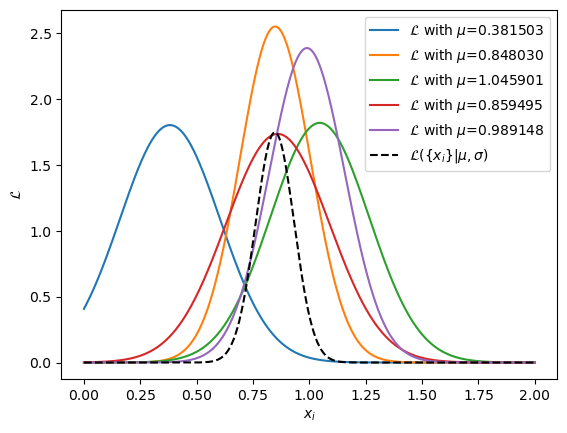

In [10]:
likelihood = np.array([norm.pdf(x_grid, loc = x_i[i], scale = sigma_i[i]) for i in range(N)])

for i in range(N):
    plt.plot(x_grid, likelihood[i], label = '$\mathcal{L}$ with $\mu$=%f' %(x_i[i]))

tot_likelihood = np.prod(likelihood, axis=0)

plt.plot(x_grid, tot_likelihood, color = 'black', ls = '--', label = '$\mathcal{L}(\{x_i\}|\mu,\sigma)$')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()

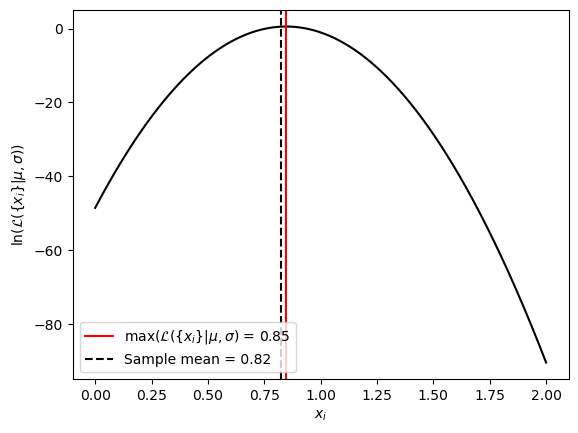

In [11]:
log_likelihood = np.log(tot_likelihood)
index_max = np.argsort(log_likelihood)[-1]
ML = x_grid[index_max]
plt.plot(x_grid, log_likelihood, color = 'black')
plt.axvline(ML, color = 'red', label = 'max($\mathcal{L}(\{x_i\}|\mu,\sigma)$ = %0.2f' %ML)
plt.axvline(np.mean(x_i), color = 'black', label = 'Sample mean = %0.2f' %np.mean(x_i), ls ='--')
plt.xlabel('$x_i$')
plt.ylabel('ln($\mathcal{L}(\{x_i\}| \mu,\sigma)$)')
plt.legend()
plt.show()

In [12]:
sigma_fisher = np.diff(log_likelihood, n=2)
sigma_fisher /= (x_grid[1]-x_grid[0])**2
sigma_fisher *= -1
sigma_fisher = 1/(sigma_fisher**0.5)

MLE_sigma = 1/np.sqrt(np.sum(1/sigma_i**2))

print('Fisher matrix error on estimated mean: %0.3f\nFisher matrix error: %0.3f' %(sigma_fisher[index_max], MLE_sigma))

Fisher matrix error on estimated mean: 0.085
Fisher matrix error: 0.085


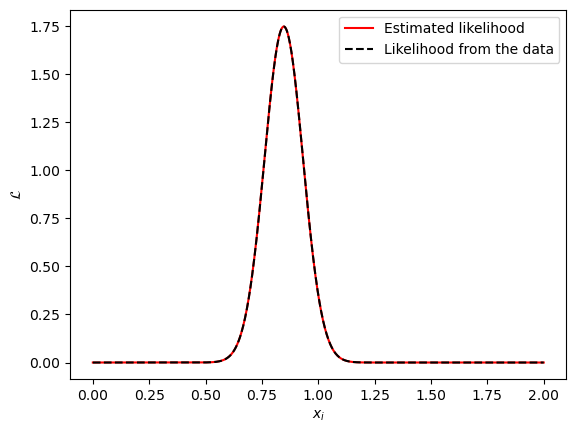

In [13]:
new_likelihood = norm.pdf(x_grid, loc = ML, scale = sigma_fisher[index_max])
plt.plot(x_grid, new_likelihood*(max(tot_likelihood)/max(new_likelihood)), color = 'red', label = 'Estimated likelihood')
plt.plot(x_grid, tot_likelihood, color = 'black', label = 'Likelihood from the data', ls='--')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()